# Exploratory Data Analysis-Lending Club Case Study analysis

#### Group Members
- Aarushi Gupta
- Ankit Sharma

LendingClub is a peer-to-peer lending company, headquartered in San Francisco, California.Investors were able to search and browse the loan listings on LendingClub website and select loans that they wanted to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors made money from the interest on these loans. LendingClub made money by charging borrowers an origination fee and investors a service fee.

The data given contains information about past loan applicants and whether they ‘defaulted’ or not. 

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. through Exploratory Data Analysis (EDA) . Thus, we have to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:
##### Loan accepted: 
If the company approves the loan, there are 3 possible scenarios described below:
##### Fully paid: 
Applicant has fully paid the loan (the principal and the interest rate)
###### Current: 
Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
###### Charged-off: 
Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 


## Importing the libraries

In [1]:
# Importing all the library  

import numpy as np                                  # importing numpy for numerical calculations
import pandas as pd                                 # importing pandas for dataframe manipulation
import matplotlib.pyplot as plt                     # for plotting the graphs
import seaborn as sns                               # for plotting the graphs
sns.set()
import warnings                                     # removing the warnings
warnings.filterwarnings("ignore")
import string                                       # importing for string manipulation
import datetime                                     # importing for date time manipulation

## Loading the dataset

In [2]:
# Reading the loan.csv file  in 'loan_data'   variable

loan_data=pd.read_csv('loan.csv',dtype='unicode')
print('(Rows, Columns) :',loan_data.shape)
loan_data.head()

(Rows, Columns) : (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


## Fixing Rows and Columns

- Finding duplicate rows and columns
- Checking the number of null values in rows and columns and dropping the columns which have all the null values present in it.
- Removing those  multiple column which have percentage of null values more percentage of null values
- Finding the uniques values in the all 53 columns
- Removing the columns which have either same value in each rows or lots of different values in each row

In [3]:
# For finding duplicate rows and removing it

loan_data.drop_duplicates(subset=['id'])
print("Rows:",loan_data.shape[0])

# For finding duplicate columns and removing it 

loan_data = loan_data.loc[:,~loan_data.columns.duplicated()]
print("Columns:",loan_data.shape[1])

Rows: 39717
Columns: 111


In [4]:
#Checking the number of null values in rows and columns

print('Total Null Rows :',loan_data.isnull().all(axis=1).sum())

print('Total Null Columns :',(loan_data.isna().sum()==loan_data.shape[0]).sum())

# Dropping the columns which have null values

loan_data.dropna(how='all', axis=1, inplace=True)

# Checking with the left out data columns
print('After removing null columns -> (Rows, Columns) :',loan_data.shape)

Total Null Rows : 0
Total Null Columns : 54
After removing null columns -> (Rows, Columns) : (39717, 57)


In [5]:
#List of columns with multiple  null values

print(loan_data[loan_data.columns[loan_data.isnull().any()]].isnull().sum())

# Removing those  multiple column which have percentage of null values more than 30 %

loan_data=loan_data.drop(loan_data.loc[:,list((100*(loan_data.isnull().sum()/len(loan_data.index))>30))].columns, 1)

# Printing with the left out data columns

print('After removing more than 30% null value left out columns -> (Rows, Columns) :',loan_data.shape)

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64
After removing more than 30% null value left out columns -> (Rows, Columns) : (39717, 53)


In [6]:
# Making a Check point for our data frame [loan_csv] for further anlaysis in 'loan_analysis' dataframe

loan_analysis=loan_data.copy()

In [7]:
# Finding the uniques values in the particular 53 columns

unique_values=loan_analysis.nunique()

# 1->Checking the coulums either unique value in particular columns is 1 or 
# 2->uniques values in particular columns is equal to the number of rows so than we can remove those columns 
# Storing them in dataframe "unq_col"

unq_col=((unique_values[unique_values==1].index) | (unique_values[unique_values==loan_analysis.shape[0]].index))

# Converting it into list that removing the column "member_id"  because we want to use our member id as " Primary key " 

remove_memberid=list(unq_col)
#remove_memberid.remove('member_id')

# Removing the columns which have either same value in each rows or lots of different values in each row

loan_analysis.drop(columns=remove_memberid,inplace=True)

# Printing with the left out data columns

print('After removing the unique columns -> (Rows, Columns) :',loan_analysis.shape)

After removing the unique columns -> (Rows, Columns) : (39717, 41)


 The fields that are created after a loan application is approved 
 doesn't make sense for our analysis towards the business objective
 So will remove the columns which is after loan approval
 list of post approval features
 1. delinq_2yrs
 2. revol_bal
 3. out_prncp
 4. total_pymnt
 5. total_rec_prncp
 6. total_rec_int
 7. total_rec_late_fee
 8. recoveries
 9. collection_recovery_fee
 10. last_pymnt_d
 11. last_pymnt_amnt
 12. next_pymnt_d
 13. chargeoff_within_12_mths
 14. mths_since_last_delinq
 15. mths_since_last_record

In [8]:
# Removing the columns which is after loan approval

col_post_approval= ['delinq_2yrs', 'revol_bal', 'out_prncp',\
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',\
       'total_rec_int', 'total_rec_late_fee', 'recoveries',\
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','title','emp_title']

# Removing emp_title also because employer title have lot of missing values and no use of it also in analysis
# Dropping the columns

loan_analysis.drop(columns=col_post_approval, inplace=True)

# Printing with the left out data columns after removing post approval columns

print('After removing the Post approval columns -> (Rows, Columns) :',loan_analysis.shape)

loan_analysis.info()

After removing the Post approval columns -> (Rows, Columns) : (39717, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             39717 non-null  object
 1   funded_amnt           39717 non-null  object
 2   funded_amnt_inv       39717 non-null  object
 3   term                  39717 non-null  object
 4   int_rate              39717 non-null  object
 5   installment           39717 non-null  object
 6   grade                 39717 non-null  object
 7   sub_grade             39717 non-null  object
 8   emp_length            38642 non-null  object
 9   home_ownership        39717 non-null  object
 10  annual_inc            39717 non-null  object
 11  verification_status   39717 non-null  object
 12  issue_d               39717 non-null  object
 13  loan_status           39717 non-null  object
 14  purpose     

## Data Preparation and Standardization

- Converting the columns to appropriate data types
- Changing columns such as loan_amnt, funded_amnt, funded_amnt_inv, installment, annual_inc, dti, inq_last_6mths, open_acc, pub_rec,total_acc, pub_rec_bankruptcies into appropriate numeric types.
- Change the columns int_rate and revol_util from string to float type by first stripping % sign and then changing to numeric type. 
- Changing column name term to term_in_month.
- Changing the date columns such as  the earliest_cr_line, issue_d, last_credit_pull_d  from string format to datetime format.
- Since loan status "Current" doesn't give any info for our analysis for approving or rejecting application, So dropping this data makes sense.
- Mapping loan status 'Fully Paid' as 0 and 'Charged_off' as 1 for our analysis

In [9]:
# Converting the columns to appropriate data types

col_to_numeric=['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','inq_last_6mths','open_acc',\
               'pub_rec','total_acc','pub_rec_bankruptcies']
loan_analysis[col_to_numeric]=loan_analysis[col_to_numeric].apply(pd.to_numeric)

# Change the column to apporiate type format

loan_analysis['int_rate'] = loan_analysis['int_rate'].str.rstrip('%').astype(float)
loan_analysis['revol_util'] = loan_analysis['revol_util'].str.rstrip('%').astype(float)


# Changing column name term to term_in_month

loan_analysis.rename(columns={'term':'term_in_months'},inplace=True)
loan_analysis['term_in_months']=loan_analysis['term_in_months'].str.rstrip('months').astype(int)

loan_analysis.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,AZ,27.65,Jan-85,1,3,0,83.7,9,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,GA,1.00,Apr-99,5,3,0,9.4,4,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,IL,8.72,Nov-01,2,2,0,98.5,10,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,CA,20.00,Feb-96,1,10,0,21.0,37,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,OR,17.94,Jan-96,0,15,0,53.9,38,May-16,0.0


In [10]:
# Function to convert string to datetime
def convert(date_time):
    format = '%b-%y' # The format
    d = datetime.datetime.strptime(date_time, format).strftime("%Y-%m")
    return d

# Changing the earliest_cr_line, issue_d  in particular format

loan_analysis['earliest_cr_line']=loan_analysis['earliest_cr_line'].apply(lambda x: convert(x))

# Filling the missing values with the mode of last credit pull date

loan_analysis['last_credit_pull_d'].fillna(value=(loan_analysis.mode()['last_credit_pull_d'][0]), inplace=True)
loan_analysis['last_credit_pull_d']=loan_analysis['last_credit_pull_d'].apply(lambda x: convert(x))

# Changing the issue_d in particular format

loan_analysis['issue_d']=loan_analysis['issue_d'].apply(lambda x: convert(x))

loan_analysis.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,AZ,27.65,1985-01,1,3,0,83.7,9,2016-05,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,GA,1.00,1999-04,5,3,0,9.4,4,2013-09,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,IL,8.72,2001-11,2,2,0,98.5,10,2016-05,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,CA,20.00,1996-02,1,10,0,21.0,37,2016-04,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,OR,17.94,1996-01,0,15,0,53.9,38,2016-05,0.0


In [11]:
# Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, 
# So dropping this data makes sense

print(loan_analysis['loan_status'].value_counts())

# Dropping rows with value current 

loan_analysis=loan_analysis[~(loan_analysis['loan_status']=='Current')]

# Mapping loan status 'Fully Paid' as 0 and 'Charged_off' as 1 for our analysis

loan_analysis['loan_status']=loan_analysis['loan_status'].map({'Fully Paid':0, 'Charged Off':1})
loan_analysis[['loan_status']].head()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


,loan_status
0,0
1,1
2,0
3,0
5,0


## Dealing with Missing Values

- Exploring all the columns with null values.
- Filling the missing values for emp_length with 10+years since this is the mode of the value and there are not much rows as compared to the entire dataset.
- Filling the missing values for revol_util with median value of the column.
- Filling the missing values for pub_rec_bankruptcies with mode of the values.

In [12]:
# Dealing with missing values
# Making a Second Check point for our data frame [loan_analysis] for further anlaysis in 'loan_missing' dataframe

loan_missing=loan_analysis.copy()

In [13]:
# Printing the columns with null values

print(loan_missing[loan_missing.columns[loan_missing.isnull().any()]].isnull().sum())

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64


In [14]:
# Filling the missing values for emp_length with Not Available of the value beacuse emp_lenght is a sensitive data 

print(loan_missing['emp_length'].value_counts())

loan_missing['emp_length'].fillna(value=(loan_missing.mode()['emp_length'][0]), inplace=True)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64


In [15]:
# Filling the missing values for revol_util with median of the values

print('Mean',loan_missing['revol_util'].mean())
print('Median',loan_missing['revol_util'].median())

loan_missing['revol_util'].fillna(value=(loan_missing['revol_util'].median()), inplace=True)

Mean 48.70277675396472
Median 49.1


In [16]:
# Filling the missing values for pub_rec_bankruptcies with mode of the values

print(loan_missing['pub_rec_bankruptcies'].value_counts())

loan_missing['pub_rec_bankruptcies'].fillna(value=(loan_missing.mode()['pub_rec_bankruptcies'][0]), inplace=True)

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


In [17]:
# Printing the columns with null values

print(loan_missing[loan_missing.columns[loan_missing.isnull().any()]].isnull().sum())

# we can see thereis no column with null values

Series([], dtype: float64)


## Dealing with Outliers

In [18]:
# Dealing with outliers - Cleaning the data
# Making a Third Check point for our data frame [loan_missing] for further anlaysis in 'loan_clean' dataframe

loan_clean=loan_missing.copy()

loan_clean.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,0.145864,13.272727,0.871737,9.275423,0.055422,48.703292,22.052648,0.042694
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,0.352975,6.673044,1.071546,4.401588,0.237804,28.346356,11.425861,0.202809
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,0.000000,8.130000,0.000000,6.000000,0.000000,25.200000,13.000000,0.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,0.000000,13.370000,1.000000,9.000000,0.000000,49.100000,20.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,0.000000,18.560000,1.000000,12.000000,0.000000,72.200000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,1.000000,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000


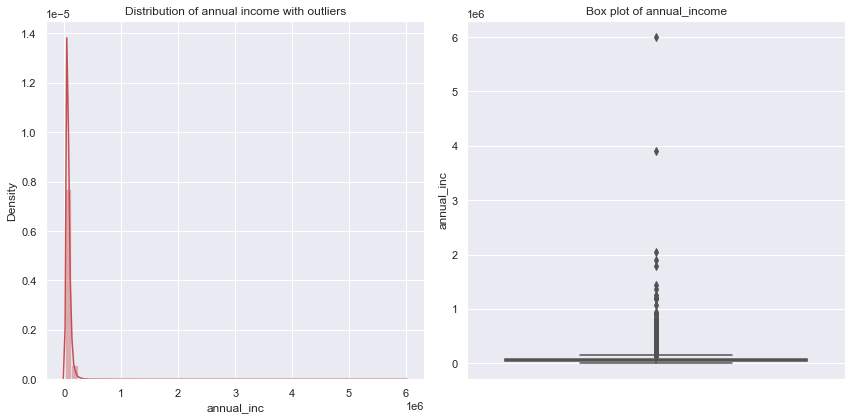

(38577, 26)


In [19]:
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
# this shows exponential variation instead of normal distribution

fig, axes = plt.subplots(1,2,figsize=(12,6))

# Distribution of loan data
sns.distplot(loan_clean['annual_inc'],color='r',ax=axes[0])
sns.boxplot(y=loan_clean['annual_inc'],color='r',ax=axes[1])
axes[0].set_title('Distribution of annual income with outliers')
axes[1].set_title('Box plot of annual_income')
plt.tight_layout()
plt.show()

print(loan_clean.shape)

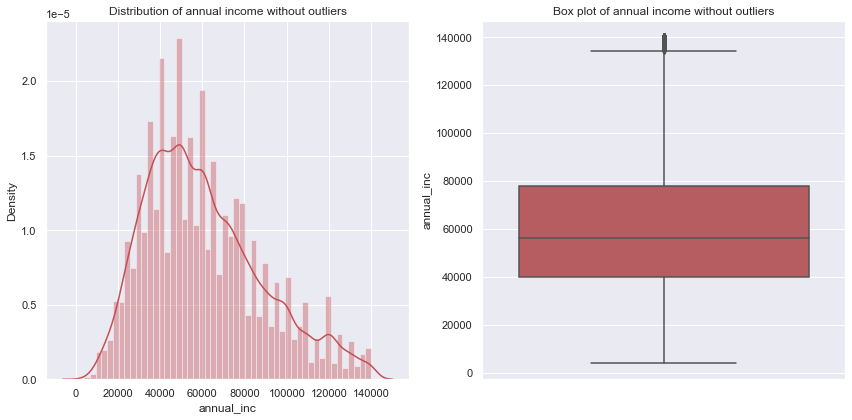

(36642, 26)


In [20]:
# There are outliers present. we need to remove them by dropping 1% or 0.5% of the problematic samples
# Here outliers are situated at the higher end
# declare a variable that will be 99th percentile of the 'annual_income' variable

max_threshold=loan_clean['annual_inc'].quantile(0.95)
loan_clean=loan_clean[loan_clean['annual_inc']<max_threshold]

fig, axes = plt.subplots(1,2,figsize=(12,6))

# Distribution of loan data
sns.distplot(loan_clean['annual_inc'],color='r',ax=axes[0])
sns.boxplot(y=loan_clean['annual_inc'],color='r',ax=axes[1])
axes[0].set_title('Distribution of annual income without outliers')
axes[1].set_title('Box plot of annual income without outliers')
plt.tight_layout()
plt.show()

print(loan_clean.shape)

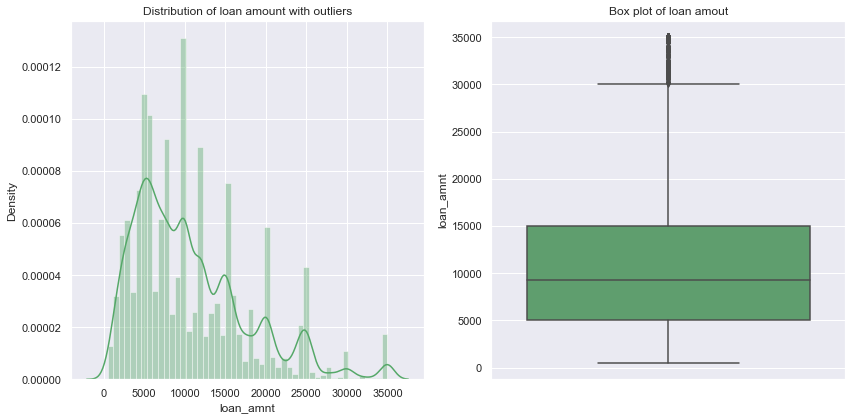

(36642, 26)


In [21]:
# Similarly exploring the data for loan amount

fig, axes = plt.subplots(1,2,figsize=(12,6))

# Distribution of loan data
sns.distplot(loan_clean['loan_amnt'],color='g',ax=axes[0])
sns.boxplot(y=loan_clean['loan_amnt'],color='g',ax=axes[1])
axes[0].set_title('Distribution of loan amount with outliers')
axes[1].set_title('Box plot of loan amout')
plt.tight_layout()
plt.show()

print(loan_clean.shape)

In [22]:
loan_clean.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000,36642.000000
mean,10681.045658,10435.008324,9892.999247,41.847716,11.887884,311.863566,60829.831120,0.147809,13.447256,0.863927,9.166366,0.056847,48.662172,21.637656,0.043911
std,7047.619569,6799.747627,6730.054355,10.303024,3.667161,199.215000,27717.831464,0.354915,6.661561,1.064108,4.352874,0.240345,28.263249,11.231134,0.205566
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5000.000000,5000.000000,4975.000000,36.000000,8.940000,163.080000,40000.000000,0.000000,8.350000,0.000000,6.000000,0.000000,25.300000,13.000000,0.000000
50%,9250.000000,9000.000000,8375.000000,36.000000,11.710000,270.410000,56000.000000,0.000000,13.580000,1.000000,8.000000,0.000000,49.100000,20.000000,0.000000
75%,15000.000000,14400.000000,13618.409453,36.000000,14.270000,408.480000,77704.050000,0.000000,18.717500,1.000000,12.000000,0.000000,72.100000,28.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,140000.000000,1.000000,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000


## Univariate Analysis

### Univariate Analysis on Categorical Variables

In [23]:
# Dealing with Univariate analysis
# Making a Fourth Check point for our data frame [loan_clean] for further anlaysis in 'loan_disp' dataframe

loan_disp=loan_clean.copy()

#### 1. Grade

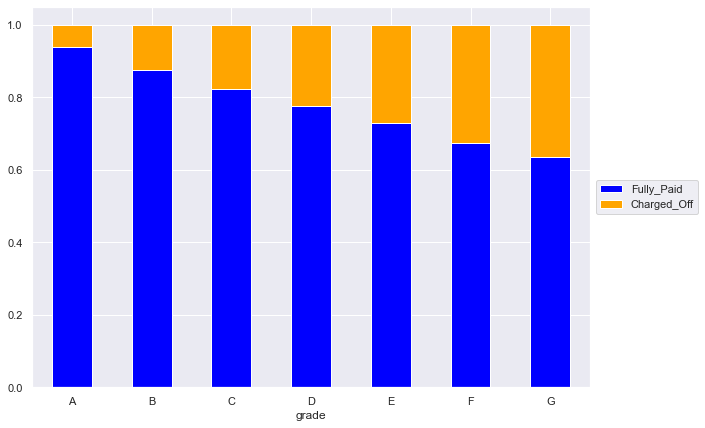

In [24]:
loan_grade=pd.crosstab(loan_disp.grade, loan_disp.loan_status, normalize='index')
loan_grade.plot(kind='bar', stacked=True, figsize=[10,7], color=['Blue','Orange'])
plt.legend(['Fully_Paid','Charged_Off'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [25]:
loan_grade.sort_values(by=1,ascending=False)
loan_grade.columns = ['Fully pay', 'Charged_Off']
loan_grade*100

,Fully pay,Charged_Off
grade,,
A,93.850461,6.149539
B,87.599135,12.400865
C,82.292363,17.707637
D,77.658254,22.341746
E,73.047035,26.952965
F,67.381490,32.618510
G,63.601533,36.398467


 Observations:

 As can be seen borrowers with grade 'A' has least chances of defaulting ,
 As the grade goes from A to G default rate increases for the borrowers

#### 2. Sub-Grade

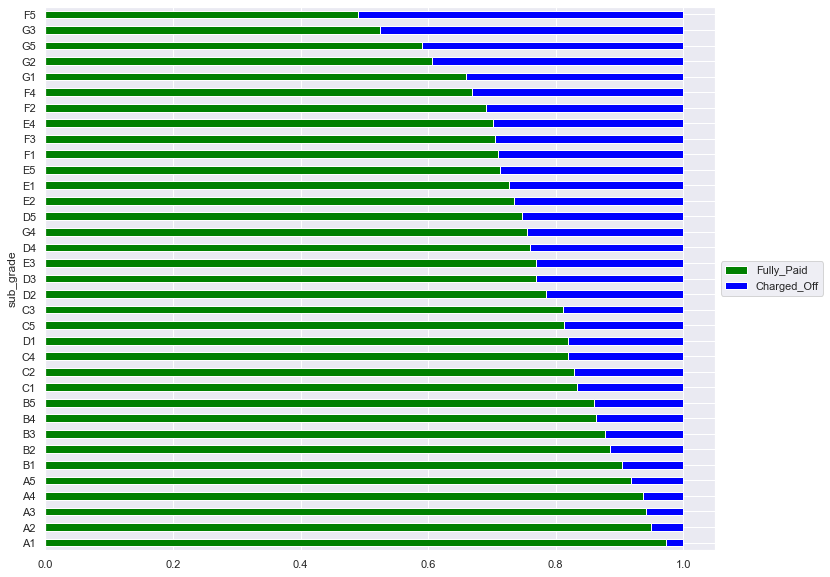

In [26]:
loan_sub=(pd.crosstab(loan_disp.sub_grade, loan_disp.loan_status, normalize='index')).sort_values(by=1)
loan_sub.plot(kind='barh', stacked=True, figsize=[12,10], color=['Green','Blue'])
plt.legend(['Fully_Paid','Charged_Off'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
loan_sub.columns = ['Fully pay', 'Charged_Off']
loan_sub.tail(10)*100

,Fully pay,Charged_Off
sub_grade,,
F1,71.014493,28.985507
F3,70.512821,29.487179
E4,70.153061,29.846939
F2,69.124424,30.875576
F4,66.906475,33.093525
G1,65.909091,34.090909
G2,60.606061,39.393939
G5,59.090909,40.909091
G3,52.500000,47.500000


 Observations : 
 As can be seen sub_grades G3, F5 and G5 have more than 50% default rate

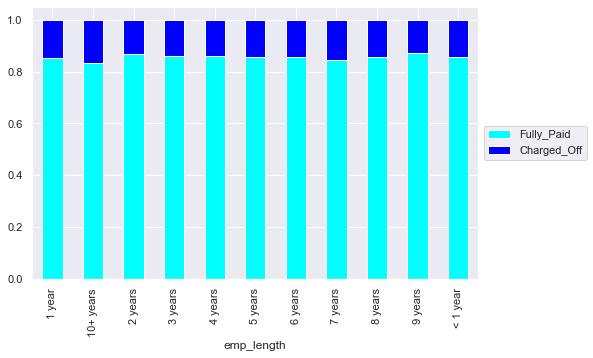

In [28]:
loan_emp=pd.crosstab(loan_disp['emp_length'], loan_disp['loan_status'],normalize='index')
loan_emp.plot(kind='bar', stacked=True, figsize=[8,5], color=['Cyan','Blue'])
plt.legend(['Fully_Paid','Charged_Off'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
loan_emp.sort_values(by=1, ascending=False)
loan_emp.columns = ['Fully pay', 'Charged_Off']
loan_emp*100

,Fully pay,Charged_Off
emp_length,,
1 year,85.244824,14.755176
10+ years,83.209710,16.790290
2 years,86.661790,13.338210
3 years,85.979597,14.020403
4 years,86.143259,13.856741
5 years,85.512484,14.487516
6 years,85.817656,14.182344
7 years,84.662203,15.337797
8 years,85.533184,14.466816


 Observations
 There is no significant effect of employment length on whether the customer will default or not
 But the borrower with no default rate have much higher chances of defaulting.

#### 4. Home Ownership

In [30]:
loan_disp['home_ownership'].value_counts()

RENT        18029
MORTGAGE    15666
OWN          2852
OTHER          92
NONE            3
Name: home_ownership, dtype: int64

In [31]:
# Replacing 'NONE' with 'OTHERS' in home_ownership since there are only 3 values for NONE

loan_disp['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

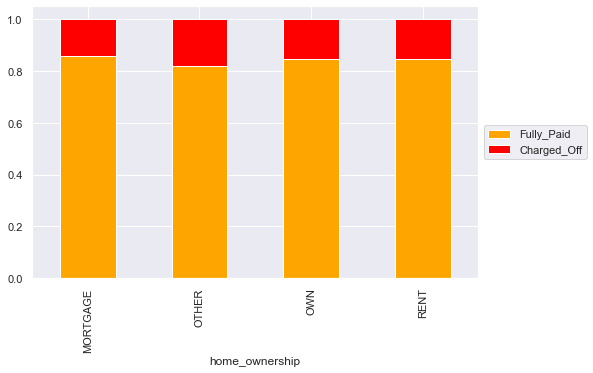

In [32]:
loan_home=pd.crosstab(loan_disp.home_ownership, loan_disp.loan_status, normalize='index')
loan_home.plot(kind='bar', stacked=True, figsize=[8,5], color=['Orange','Red'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [33]:
loan_home.sort_values(by=1, ascending=False)
loan_home.columns = ['Fully pay', 'Charged_Off']
loan_home*100

,Fully pay,Charged_Off
home_ownership,,
MORTGAGE,86.007915,13.992085
OTHER,82.105263,17.894737
OWN,84.782609,15.217391
RENT,84.619225,15.380775


 Observations:

 Nothing much can be concluded for the home ownership since the default rate is almost similar for all the categories
 Also the 'OTHER' category is not specified

#### 5. Verification Status

In [34]:
loan_disp['verification_status'].value_counts()

Not Verified       16278
Verified           11214
Source Verified     9150
Name: verification_status, dtype: int64

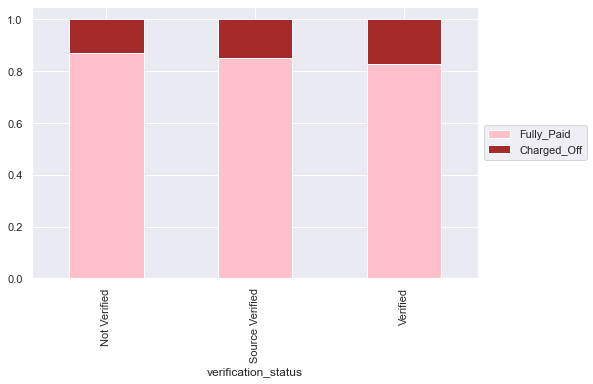

In [35]:
loan_ver=pd.crosstab(loan_disp.verification_status, loan_disp.loan_status, normalize='index')
loan_ver.plot(kind='bar', stacked=True, figsize=[8,5], color=['Pink','Brown'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [36]:
loan_ver.sort_values(by=1, ascending=False)
loan_ver.columns = ['Fully pay', 'Charged_Off']
loan_ver*100

,Fully pay,Charged_Off
verification_status,,
Not Verified,87.129869,12.870131
Source Verified,84.994536,15.005464
Verified,82.628857,17.371143


 Observation:

 As can be seen verified customers have higher default rate which means the verifiaction process might not be correct.

#### 6. Purpose

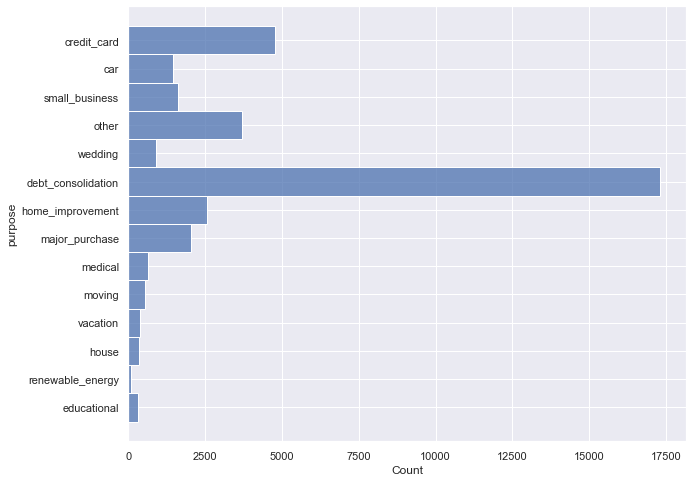

In [37]:
plt.figure(figsize=[10,8])
loan_disp['purpose'].value_counts()
sns.histplot(y='purpose',data=loan_clean);
plt.show()
# Maximum people take loans for debt consolidation

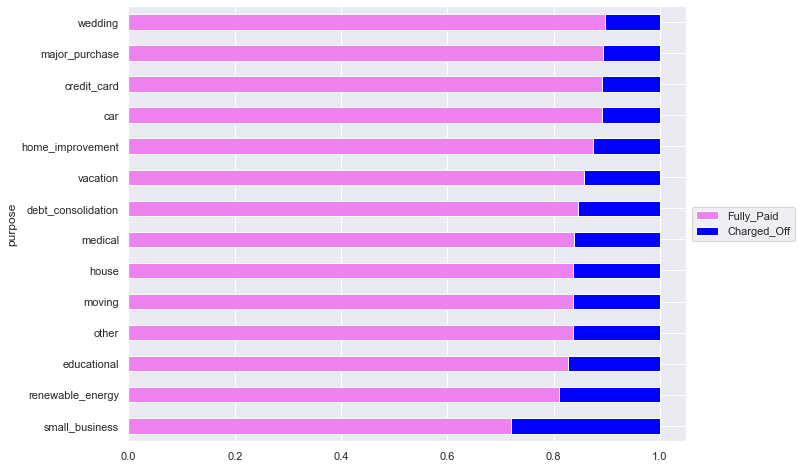

In [38]:
loan_pur=pd.crosstab(loan_disp.purpose, loan_disp.loan_status, normalize='index').sort_values(by=1, ascending=False)
loan_pur.plot(kind='barh', stacked=True, figsize=[10,8], color=['Violet','Blue'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
loan_pur.columns = ['Fully pay', 'Charged_Off']
loan_pur*100

,Fully pay,Charged_Off
purpose,,
small_business,72.027110,27.972890
renewable_energy,81.052632,18.947368
educational,82.692308,17.307692
other,83.630952,16.369048
moving,83.636364,16.363636
house,83.727811,16.272189
medical,83.750000,16.250000
debt_consolidation,84.538466,15.461534
vacation,85.753425,14.246575


Observations

 It can be seen that the borrowers who are taking the loan for small_businesses and renewable energies
 Have highest default rate which is about 25% and 19% respectively

#### 7. State provided by the borrower

In [40]:
loan_disp['addr_state'].value_counts()[:8]

CA    6560
NY    3463
FL    2652
TX    2476
NJ    1671
PA    1422
IL    1405
VA    1308
Name: addr_state, dtype: int64

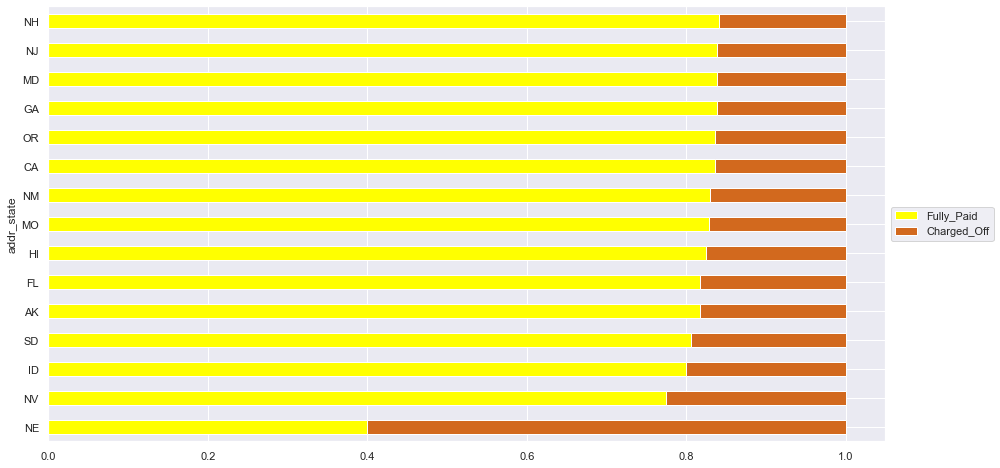

In [41]:
loan_state=pd.crosstab(loan_disp.addr_state, loan_disp.loan_status, normalize='index').sort_values(by=1, ascending=False)
loan_state.head(15).plot(kind='barh', stacked=True, figsize=[15,8], color=['Yellow','Chocolate'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
loan_state.columns = ['Fully pay', 'Charged_Off']
loan_state.head()*100

,Fully pay,Charged_Off
addr_state,,
NE,40.000000,60.000000
NV,77.461707,22.538293
ID,80.000000,20.000000
SD,80.645161,19.354839
AK,81.690141,18.309859


 Observations:
 
 As can be seen the most risky state is NE which accounts for 60% default rate

#### 8. Inquiries in last 6 months

In [43]:
loan_disp['inq_last_6mths'].value_counts()

0    17857
1    10135
2     5334
3     2793
4      291
5      134
6       56
7       32
8       10
Name: inq_last_6mths, dtype: int64

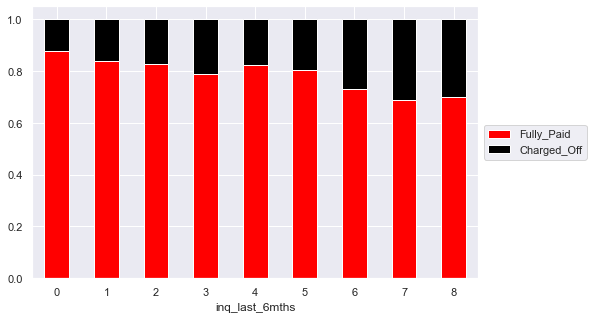

In [44]:
loan_inq=pd.crosstab(loan_disp.inq_last_6mths, loan_disp.loan_status, normalize='index')
loan_inq.plot(kind='bar', stacked=True, figsize=[8,5], color=['Red','Black'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [45]:
loan_inq.sort_values(by=1, ascending=False)
loan_inq.columns = ['Fully pay', 'Charged_Off']
loan_inq*100

,Fully pay,Charged_Off
inq_last_6mths,,
0,87.691102,12.308898
1,84.074988,15.925012
2,82.958380,17.041620
3,78.875761,21.124239
4,82.474227,17.525773
5,80.597015,19.402985
6,73.214286,26.785714
7,68.750000,31.250000
8,70.000000,30.000000


 Observations:
 
 Most borrowers which can default have 7 and 6 enquiries in the last 6 months with default rate of above 25%

#### 9. Number of open credit lines in the borrower's credit file

In [46]:
loan_disp['open_acc'].value_counts()[:8]

7     3775
6     3712
8     3667
9     3447
5     3026
10    2929
11    2488
4     2253
Name: open_acc, dtype: int64

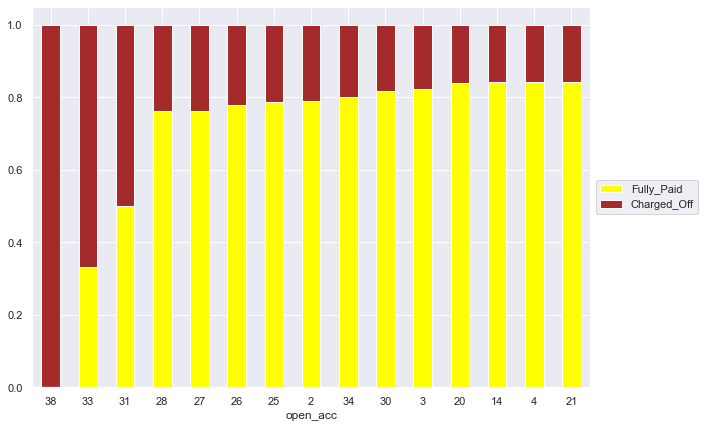

In [47]:
loan_open=pd.crosstab(loan_disp.open_acc, loan_disp.loan_status, normalize='index').sort_values(by=1, ascending=False)
loan_open.head(15).plot(kind='bar', stacked=True, figsize=[10,7], color=['Yellow','Brown'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [48]:
loan_open.columns = ['Fully pay', 'Charged_Off']
loan_open.head()*100

,Fully pay,Charged_Off
open_acc,,
38,0.000000,100.000000
33,33.333333,66.666667
31,50.000000,50.000000
28,76.190476,23.809524
27,76.190476,23.809524


 Observations:

 borrowers with very large credit lines such as the borrower with 33 or 38 is least likely to pay his loan back.
 thus, risk increases for borrowers with many credit lines open

#### 10. Number of derogatory public records

In [49]:
loan_disp['pub_rec'].value_counts()

0    34623
1     1965
2       46
3        6
4        2
Name: pub_rec, dtype: int64

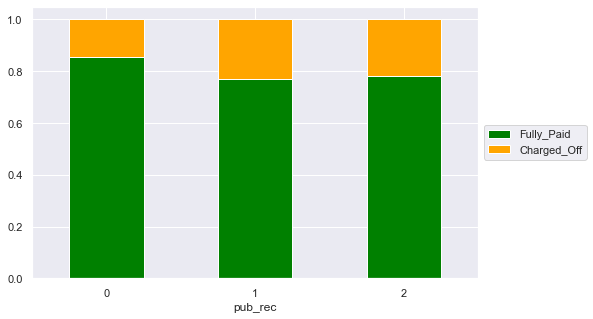

In [50]:
loan_pub=pd.crosstab(loan_disp.pub_rec, loan_disp.loan_status, normalize='index')
loan_pub[:3].plot(kind='bar', stacked=True, figsize=[8,5], color=['Green','Orange'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [51]:
loan_pub.sort_values(by=1, ascending=False)[:3]
loan_pub.columns = ['Fully pay', 'Charged_Off']
loan_pub.head(3)*100

,Fully pay,Charged_Off
pub_rec,,
0,85.682928,14.317072
1,77.150127,22.849873
2,78.260870,21.739130


 Observations:

it can be seen that borrowers with non-zero derogatory public records are more likely to default (hence charged off).

#### 11. Number of public record bankruptcies

In [52]:
loan_disp['pub_rec_bankruptcies'].value_counts()

0.0    35038
1.0     1599
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

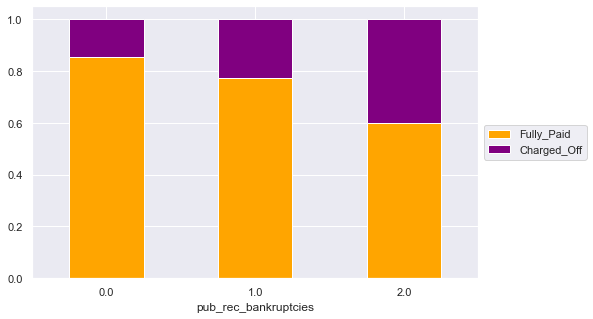

In [53]:
loan_pubrec=pd.crosstab(loan_disp.pub_rec_bankruptcies, loan_disp.loan_status, normalize='index')
loan_pubrec.plot(kind='bar', stacked=True, figsize=[8,5], color=['Orange','Purple'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [54]:
loan_pubrec.sort_values(by=1, ascending=False)
loan_pubrec.columns = ['Fully pay', 'Charged_Off']
loan_pubrec*100

,Fully pay,Charged_Off
pub_rec_bankruptcies,,
0.0,85.578515,14.421485
1.0,77.423390,22.576610
2.0,60.000000,40.000000


 Observations:

 As can be seen more the number of public bankruptcy records, higher the chances of defaulting the loan.

#### 12. Term in months

In [55]:
loan_disp['term_in_months'].value_counts()

36    27714
60     8928
Name: term_in_months, dtype: int64

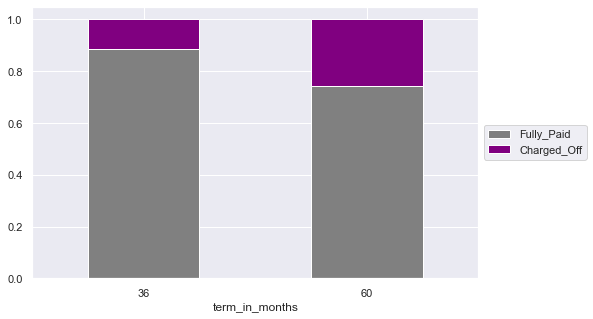

In [56]:
loan_term=pd.crosstab(loan_disp.term_in_months, loan_disp.loan_status, normalize='index')
loan_term.plot(kind='bar', stacked=True, figsize=[8,5], color=['Gray','Purple'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [57]:
loan_term.sort_values(by=1, ascending=False)
loan_term.columns = ['Fully pay', 'Charged_Off']
loan_term*100

,Fully pay,Charged_Off
term_in_months,,
36,88.767410,11.232590
60,74.204749,25.795251


 Observations:

 borrowers with number of payments in 60 months are more likely to default. 'Hence are charged off'

### Univariate Analysis on Numerical Variables

#### 1. Relationship between Interest Rate and Loan Status

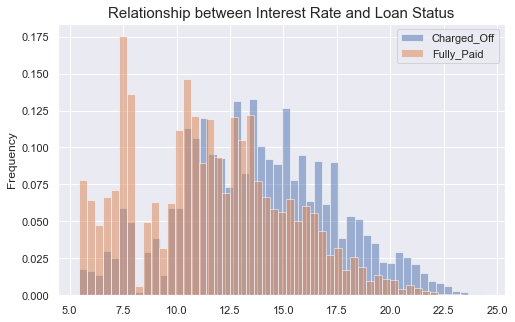

In [58]:
plt.figure(figsize=[8,5])
loan_disp['int_rate'][loan_disp['loan_status']==1].plot.hist(bins=50,density=True,alpha=0.5,label='Charged_Off')
loan_disp['int_rate'][loan_disp['loan_status']==0].plot.hist(bins=50,density=True,alpha=0.5, label='Fully_Paid')
plt.title("Relationship between Interest Rate and Loan Status",fontsize=15)
plt.legend()
plt.show()

In [59]:
loan_disp.loan_status[loan_disp.int_rate < 11.5].value_counts(normalize=True)*100


0    91.305326
1     8.694674
Name: loan_status, dtype: float64

In [60]:
loan_disp.loan_status[loan_disp.int_rate >= 11.5].value_counts(normalize=True)*100

0    79.48147
1    20.51853
Name: loan_status, dtype: float64

Observation :

Thus, when the interest rate is greater than or equal to 11.5%, the loan default rate is more than twice that when the interest rate is below 11.5%

#### 2. Relationship between Annual Income of borrower and Loan Status

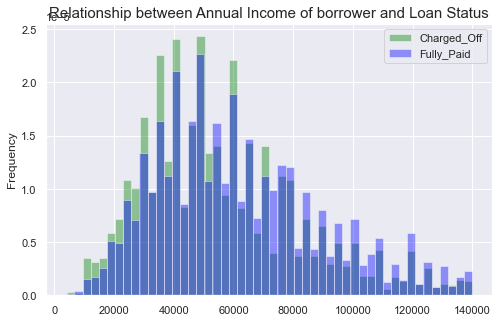

In [61]:
plt.figure(figsize=[8,5])
loan_disp['annual_inc'][loan_disp['loan_status']==1].plot.hist(bins=50,density=True,alpha=0.4,label='Charged_Off',color='Green')
loan_disp['annual_inc'][loan_disp['loan_status']==0].plot.hist(bins=50,density=True,alpha=0.4, label='Fully_Paid',color='blue')
plt.title("Relationship between Annual Income of borrower and Loan Status",fontsize=15)
plt.legend()
plt.show()

In [62]:
loan_disp.loan_status[loan_disp.annual_inc <= 70000].value_counts(normalize=True)*100

0    83.880752
1    16.119248
Name: loan_status, dtype: float64

In [63]:
loan_disp.loan_status[loan_disp.annual_inc > 7000].value_counts(normalize=True)*100

0    85.223208
1    14.776792
Name: loan_status, dtype: float64

Observation :
The borrowers with high annual income has lesser chances of being charged off and hence lesser chances of defaulting the loan

### Segmented Univariate Analysis on Numerical Variables

#### 1. Loan Amount

In [64]:
loan_disp['loan_amnt'].describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [65]:
loan_disp['loan_amnt_range'] = pd.cut(loan_disp['loan_amnt'],[400,3500,6500,9000,12500,16000],5,labels=['Very Low','Low','Medium','High','Very High'])
loan_disp.loan_amnt_range.unique()

['Low', 'Very Low', 'High', 'Medium', NaN, 'Very High']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [66]:
df_loan_amount_range=pd.crosstab(loan_disp['loan_amnt_range'], loan_disp['loan_status'], normalize='index')

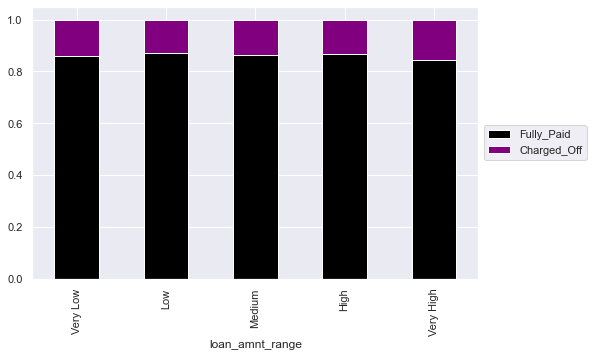

In [67]:
df_loan_amount_range.plot(kind='bar', stacked=True, figsize=[8,5], color=['Black','Purple'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [68]:
df_loan_amount_range.sort_values(by=1, ascending=False)
df_loan_amount_range.columns = ['Fully pay', 'Charged_Off']
df_loan_amount_range*100

,Fully pay,Charged_Off
loan_amnt_range,,
Very Low,85.899152,14.100848
Low,87.121212,12.878788
Medium,86.465056,13.534944
High,86.682537,13.317463
Very High,84.368994,15.631006


 Observations :
 It can be seen that higher the loan amount higher are the chances of default

#### 2. Installment

In [69]:
loan_disp['installment'].describe()

count    36642.000000
mean       311.863566
std        199.215000
min         15.690000
25%        163.080000
50%        270.410000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

In [70]:
loan_disp['installment_range']=pd.cut(loan_disp['installment'],[0,500,800,1500],3,labels=['Low Ins','Medium Ins','High Ins'])

In [71]:
loan_disp['installment_range'].value_counts()

Low Ins       30771
Medium Ins     4682
High Ins       1189
Name: installment_range, dtype: int64

In [72]:
df_installment_amount_range=pd.crosstab(loan_disp['installment_range'], loan_disp['loan_status'], normalize='index')

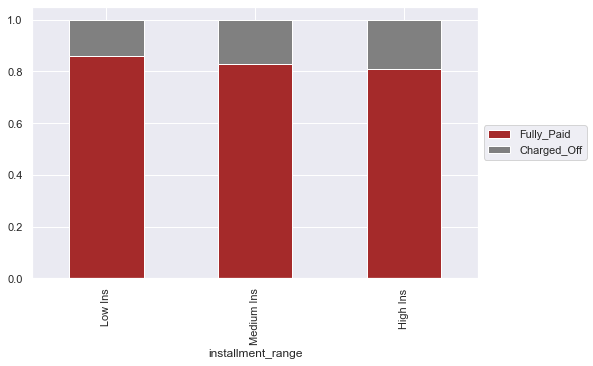

In [73]:
df_installment_amount_range.plot(kind='bar', stacked=True, figsize=[8,5], color=['Brown','Gray'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [74]:
df_installment_amount_range.sort_values(by=1, ascending=False)
df_installment_amount_range.columns = ['Fully pay', 'Charged_Off']
df_installment_amount_range*100

,Fully pay,Charged_Off
installment_range,,
Low Ins,85.733320,14.266680
Medium Ins,82.913285,17.086715
High Ins,80.992431,19.007569


Observations :
    
It can be seen high installments increases loan default

#### 3. Debt to Income Ratio

In [75]:
loan_disp['dti'].describe()

count    36642.000000
mean        13.447256
std          6.661561
min          0.000000
25%          8.350000
50%         13.580000
75%         18.717500
max         29.990000
Name: dti, dtype: float64

In [76]:
loan_disp['dti_range']=pd.cut(loan_disp['dti'],[-1,10,20,30],3,labels=['Low dti','Medium dti','High dti'])

In [77]:
loan_disp['dti_range'].value_counts()

Medium dti    17689
Low dti       11881
High dti       7072
Name: dti_range, dtype: int64

In [78]:
df_dti_range=pd.crosstab(loan_disp['dti_range'], loan_disp['loan_status'], normalize='index')

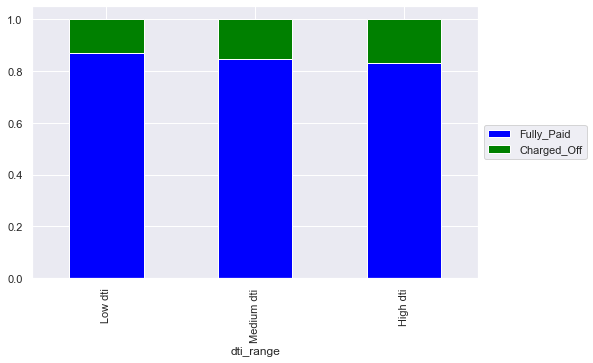

In [79]:
df_dti_range.plot(kind='bar', stacked=True, figsize=[8,5], color=['Blue','Green'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [80]:
df_dti_range.sort_values(by=1, ascending=False)
df_dti_range.columns = ['Fully pay', 'Get Defaulter']
df_dti_range*100

,Fully pay,Get Defaulter
dti_range,,
Low dti,87.097046,12.902954
Medium dti,84.775849,15.224151
High dti,83.173077,16.826923


Observations :

 It can be seen that larger the debt to income ratio, higher the chances of loan default. 
 Lesser the debt to income ratio, better are the chances of the borrower to fully pay the loan

#### 4. Revol_Util

In [81]:
loan_disp['revol_util'].describe()

count    36642.000000
mean        48.662172
std         28.263249
min          0.000000
25%         25.300000
50%         49.100000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [82]:
loan_disp['revol_util_range'] = pd.cut(loan_disp['revol_util'],[-1,20,40,60,80,100],5,labels=['Very Low','Low','Medium','High','Very High'])
loan_disp.revol_util_range.unique()

['Very High', 'Very Low', 'Low', 'High', 'Medium']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [83]:
loan_disp['revol_util_range'].value_counts()

Medium       8072
High         7593
Low          7388
Very Low     7328
Very High    6261
Name: revol_util_range, dtype: int64

In [84]:
df_revol_util_range=pd.crosstab(loan_disp['revol_util_range'], loan_disp['loan_status'], normalize='index')

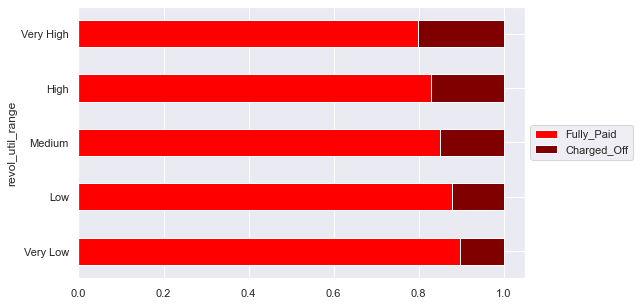

In [85]:
df_revol_util_range.plot(kind='barh', stacked=True, figsize=[8,5], color=['Red','Maroon'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [86]:
df_revol_util_range.sort_values(by=1, ascending=False)
df_revol_util_range.columns = ['Fully pay', 'Get Defaulter']
df_revol_util_range*100

,Fully pay,Get Defaulter
revol_util_range,,
Very Low,89.847162,10.152838
Low,87.831619,12.168381
Medium,85.133796,14.866204
High,82.813117,17.186883
Very High,79.747644,20.252356


In [87]:
loan_disp['annual_inc'].describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

In [88]:
loan_disp['annual_inc_range'] = pd.cut(loan_disp['annual_inc'],[3000,30400,57800,85200,112600,160000],5,labels=['Very Low','Low','Medium','High','Very High'])
loan_disp.revol_util_range.unique()

['Very High', 'Very Low', 'Low', 'High', 'Medium']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

Observations :

It is clearly visible that revolving line utilization rate has a large impact to the default percentage. 
When this increases, the charged off percentage rises.

## Derived Metrics

#### 1. Issue_d : The month and year in which the loan was funded

In [89]:
df_derived=loan_clean.copy()

In [90]:
df_derived['issue_d_month']=pd.DatetimeIndex(df_derived['issue_d']).month
df_derived['issue_d_year']=pd.DatetimeIndex(df_derived['issue_d']).year
df_derived.drop(columns=['issue_d'], axis=1, inplace=True)

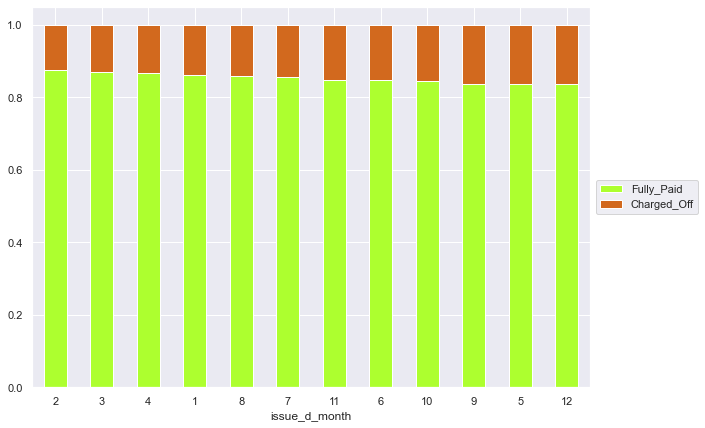

In [91]:
(pd.crosstab(df_derived.issue_d_month, df_derived.loan_status, normalize='index').sort_values(by=1)).plot(kind='bar', stacked=True, figsize=[10,7], color=['greenyellow','Chocolate'])
plt.legend(['Fully_Paid','Charged_Off'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()

In [92]:
pd.crosstab(df_derived.issue_d_month, df_derived.loan_status, normalize='index').sort_values(by=1, ascending=False)

loan_status,0,1
issue_d_month,,
12,0.836775,0.163225
5,0.837518,0.162482
9,0.837846,0.162154
10,0.845696,0.154304
6,0.846742,0.153258
11,0.848168,0.151832
7,0.857188,0.142812
8,0.859988,0.140012
1,0.862814,0.137186


Observations : 

The late months (December) of an year indicated the high possibility of defaulting due to christmas 
and other US festivals
May is also another one, which is during the summer break in US where people love to travel.



In [93]:
df_derived.shape

(36642, 27)

# Recommendations on the basis Univariate Analysis

The below analysis type of customer could be charged off due to univariate analysis:

1. The chances of Grade 'G' customer to be charged off is high 36 %

2. The chances of Sub-Grade 'F5' customer to be charged off is high 51 %

3. Most of the people with small business are having high chances to get charged off 27%

4. Most risky states from analysis is 'NE' with almost 60% get charged off

5. Most borrowers which can be charged off have 7 and 6 enquiries in the last 6 months with default rate of above 25%

6. Borrowers with very large credit lines such as '33 or 38' is most likely to get charged off

7. Borrowers with number of payments in' 60 months' are more likely to default. 'Hence are charged off'

8. Borrowers with higher interest rate than '11.5%' could be possibly highly  get charged off 

9. Borrowers whose annuaa income is less than '70000' are most likely to takes loan and also most likely to get charged off

10. Most of people who likely to miss there loan in month of 'December' and 'may' likely to get charged off

## Bivariate Analysis

We first draw a heatmap for the correlation matrix of all the variables so as to get an insight about the relationships between various various present in the dataset

In [94]:
loan=loan_disp.copy()

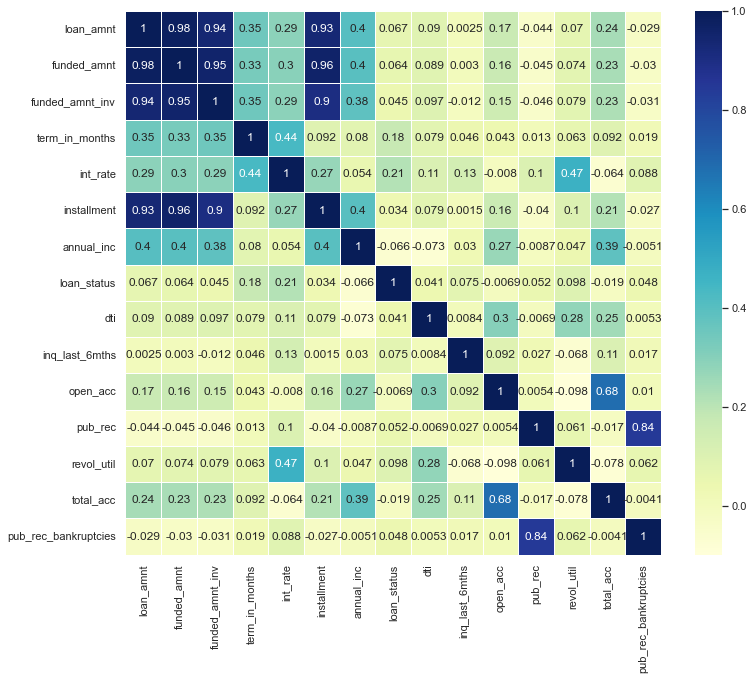

In [95]:
plt.figure(figsize=[12,10])
sns.heatmap(loan.corr(), cmap='YlGnBu', linewidths=.5,  annot=True)
plt.show()

As can be seen that there is strong relationship between:
- Loan amount and Installment
- Number of derogatory public record and number of public record bankruptcies
- Number of open credit lines in the borrower's credit files and the total number of credit lines currently in borrower's account
- Interest rate and revolving line utilization rate

### 1. Relationship between loan amount and installment

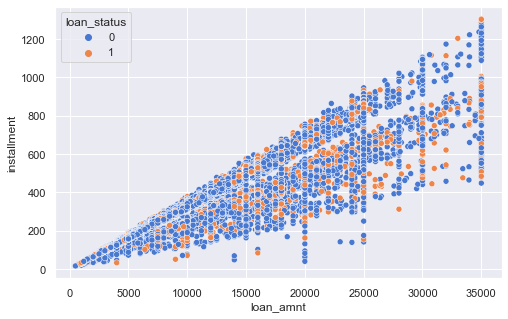

In [96]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=loan, x='loan_amnt', y='installment', hue='loan_status', palette='muted')
plt.show()

# Observation :
 There is a strong relationship between loan amount and installment higher the loan amount applied for, higher will be installments for the borrower.

### 2. Relationship between Number of derogatory public record and number of public record bankruptcies

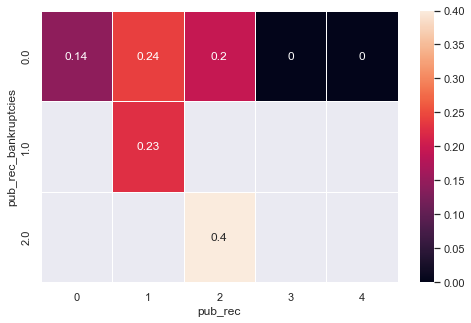

In [97]:
pt1 = pd.pivot_table(data=loan,values='loan_status', columns='pub_rec', index='pub_rec_bankruptcies')
plt.figure(figsize=[8,5])
sns.heatmap(pt1, linewidths=.5, annot=True)
plt.show()

In [98]:
pt1

pub_rec,0,1,2,3,4
pub_rec_bankruptcies,,,,,
0.0,0.143171,0.240437,0.195122,0.0,0.0
1.0,NaN,0.225766,NaN,NaN,NaN
2.0,NaN,NaN,0.400000,NaN,NaN


### Observation :
 It is clearly visible that the more chances of loan default are for the customer with one or more public degoratory and public bankruptcies

### 3. Relationship between Annual income of applicant and purpose of taking the loan

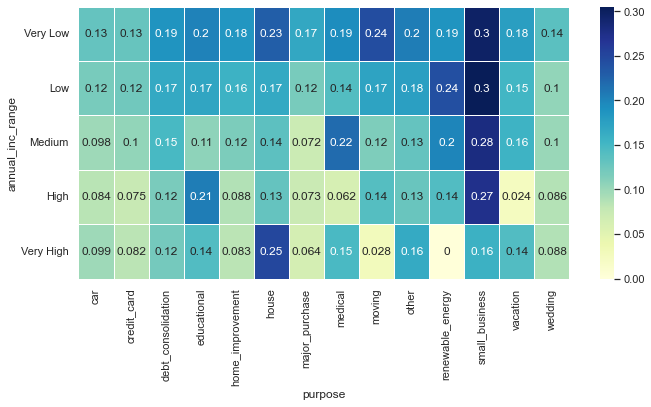

In [99]:
pt2 = pd.pivot_table(data=loan,values='loan_status', index='annual_inc_range', columns='purpose')
plt.figure(figsize=[11,5])
sns.heatmap(pt2, linewidths=.5, cmap='YlGnBu', annot=True)
plt.yticks(rotation=360)
plt.show()

In [100]:
pt2


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
annual_inc_range,,,,,,,,,,,,,,
Very Low,0.130252,0.129555,0.187435,0.201835,0.184615,0.228571,0.167630,0.193182,0.243697,0.204871,0.187500,0.296296,0.177419,0.136364
Low,0.118674,0.123539,0.165745,0.169811,0.156984,0.166667,0.118372,0.140741,0.172414,0.175168,0.242424,0.304833,0.151899,0.103933
Medium,0.097744,0.103905,0.148224,0.107143,0.116587,0.135135,0.071685,0.218579,0.115044,0.129843,0.200000,0.279245,0.155556,0.100671
High,0.083832,0.075153,0.117560,0.205882,0.087912,0.130435,0.072727,0.061538,0.140000,0.127937,0.142857,0.272358,0.024390,0.086022
Very High,0.098592,0.082317,0.120635,0.142857,0.083333,0.250000,0.063636,0.147059,0.027778,0.164706,0.000000,0.158333,0.142857,0.087719


### Observations

 People with high annual incomes apply loan for the purpose of small business, house, renewable energy
 
 People with low income usually need loan for car, debt consolidation, educational purposes


### 4. Relationship between Annual income of applicant and Loan amount applied for

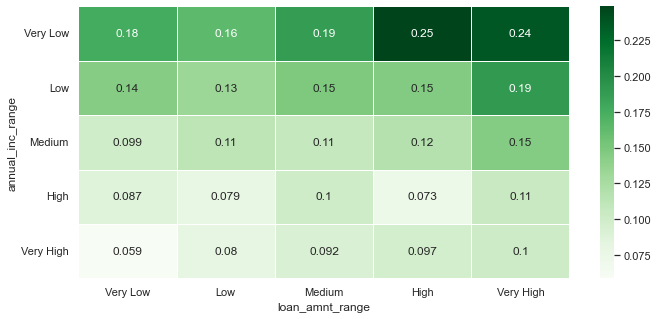

In [101]:
pt4 = pd.pivot_table(data=loan,values='loan_status', index='annual_inc_range', columns='loan_amnt_range')
plt.figure(figsize=[11,5])
sns.heatmap(pt4, linewidths=.5, cmap='Greens', annot=True)
plt.yticks(rotation=360)
plt.show()

In [102]:
pt4


loan_amnt_range,Very Low,Low,Medium,High,Very High
annual_inc_range,,,,,
Very Low,0.176301,0.164747,0.187668,0.248598,0.237179
Low,0.144421,0.132917,0.148363,0.145778,0.189866
Medium,0.099415,0.112797,0.107073,0.118353,0.145509
High,0.087500,0.078669,0.101215,0.072941,0.105691
Very High,0.058824,0.079848,0.091703,0.096939,0.102167


### Observations
- It is interesting to see that people with low annual income need high loan amount which is obvious from the fact that
- if someone earns less, that person will need more money(loan) from the banks

### 5. Relationship between annual income and debt to income ratio

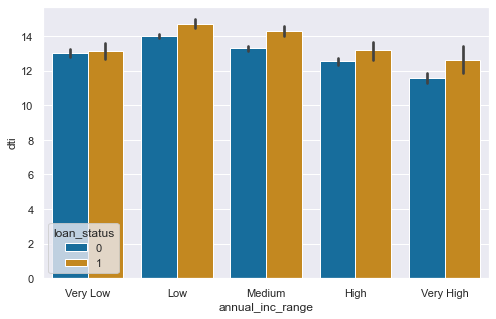

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(data =loan,x='annual_inc_range', y='dti', hue ='loan_status', palette="colorblind")
plt.show()

In [104]:
pd.pivot_table(data=loan,values='loan_status', index='annual_inc_range', columns='dti_range')

dti_range,Low dti,Medium dti,High dti
annual_inc_range,,,
Very Low,0.177275,0.192153,0.183007
Low,0.138331,0.164816,0.176112
Medium,0.117916,0.141162,0.165406
High,0.099088,0.117540,0.133956
Very High,0.095032,0.123762,0.121457


### Observation

 People with low annual income have large debt to income ratio since the debt is more as compared to his income 
 
 Hence, there default rate is higher

### 6. Relationship between Grade and Interest Rate of the borrower

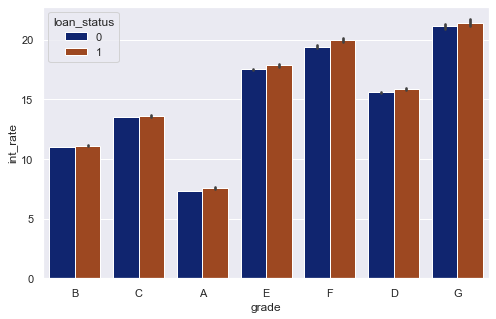

In [105]:
plt.figure(figsize=(8,5))
sns.barplot(data =loan,x='grade', y='int_rate', hue ='loan_status', palette="dark")
plt.show()


 ### Observation
 It can clearly be seen that G, F grade borrowers will get loan but for high interest rate and chances of default are higher

### 7. Relationship between Interest Rate and Loan Amount

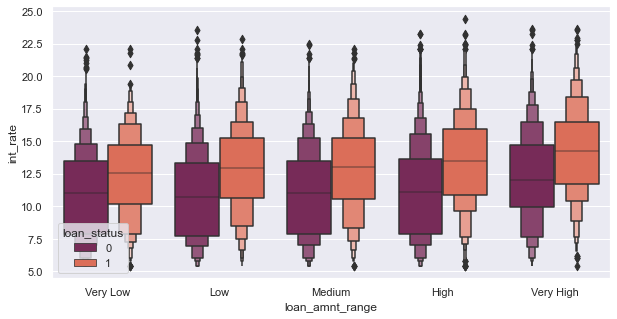

In [106]:
plt.figure(figsize=(10,5))
sns.boxenplot(data =loan,y ='int_rate', x ='loan_amnt_range', hue ='loan_status' ,palette="rocket")
plt.show()


 ### Observation
 Borrowers applying for very high loan amount will have more terms(terms in months) and thus their interest rate will increases
 leading to increase in default rate

### 8. Relationship between Loan amount and term in months

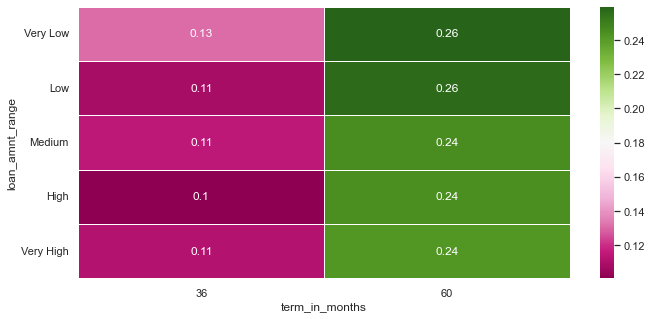

In [107]:
pt8 = pd.pivot_table(data=loan,values='loan_status', index='loan_amnt_range', columns='term_in_months')
plt.figure(figsize=[11,5])
sns.heatmap(pt8, linewidths=.5, cmap='PiYG', annot=True)
plt.yticks(rotation=360)
plt.show()

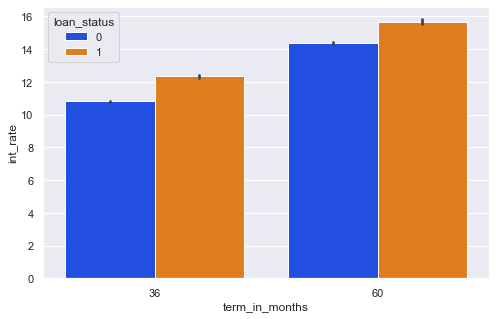

In [108]:
pd.pivot_table(data=loan,values='loan_status', index='term_in_months', columns='loan_amnt_range')

plt.figure(figsize=(8,5))
sns.barplot(data =loan,x='term_in_months', y='int_rate', hue ='loan_status', palette="bright")
plt.show()


### Observations
Borrowers with term of 60 months whatever loan amount he has applied for have much greater chnaces of default
The reason as can be seen from the bar plot might be that as the term increases the interest rate also increases with time

# Recommendations on the basis of bivariate analysis
1.  Applicants that apply for larger loan amount will have larger installments 
2.  More chances of loan default are for the applicants with one or more public degoratory and public bankruptcies
3. Applicants with very low to low annual income 3k-50k takes loan for buying a car or for educational purposes while applicants with annual income as high as 100k-160k apply loan for buying or building a house
4. Applicants who have taken a loan for small business and the loan amount is greater than 10k
5. Applicants with low annual income of around 10k-50k need high loan amount 12k-40k which is obvious from the fact that if someone earns less, that person will need more money(loan) from the banks
6. Applicants with low annual income have high debt to income ratio and thus their default rate is higher.
7. Applicants with grades of F or G have higher default rates and they are given loan for higher interest rates of around 20%.
8. Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of more that 20%.
9. Applicants with terms of 60 months are more likely to default since the interest rate increases for such applicants. 